# Feature Engineering

- Feature engineering is a process of improving attributes and features. It is a non-written procedural way of selecting and transforming data features. It is indeed helpful to write more insights as well as visualising data clearly.
- It includes converting data and data types to convenient mode to retrieve useful information at any point during processing.


**Why do we do Feature Engineering?**
- Improve the model performance.
- Set the input data compatible to process to the model.
- Increase the level of visualization to create more insights.

## Loading the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = sklearn.datasets.load_boston()

In [ ]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Data description:
    -- CRIM per capita crime rate by town
    --ZN proportion of residential land zoned for lots over 25,000 sq.ft.
    --INDUS proportion of non-retail business acres per town
    --CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
    --NOX nitric oxides concentration (parts per 10 million)
    --RM average number of rooms per dwelling
    --AGE proportion of owner-occupied units built prior to 1940
    --DIS weighted distances to five Boston employment centres
    --RAD index of accessibility to radial highways
    --TAX full-value property-tax rate per $10,000
    --PTRATIO pupil-teacher ratio by town
    --B 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
    --LSTAT % lower status of the population
    --MEDV Median value of owner-occupied homes in $1000’s

In [ ]:
df['price'] = dataset.target

In [ ]:
df.shape

(506, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation: 


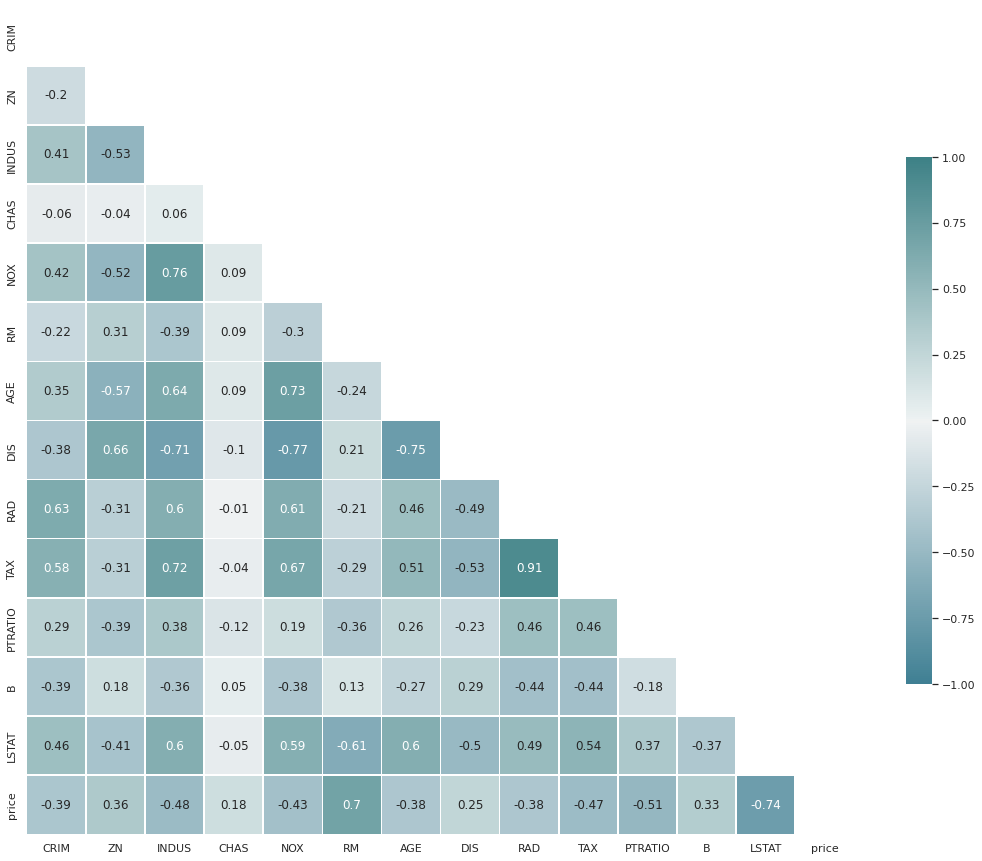

In [ ]:
corr = df.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f1, ax1 = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 200, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": 0.5}, annot=True)
plt.tight_layout()
plt.show()

- We can see that Nox and INDUS are proportional, which means NOx content is high in the high non-retail areas.
-  Also , the Tax is high in non-retail areas.
- Correlation for Tax and Radial highways access is high.

## EDA and Feature Engineering

- Finding Correlation to find similar features for the model
- Feature transformation
- Feature Importance
- Standardization and Normalization
- Label Encoding and One Hot Encoding

-> Let's see the data features which are categorical and numerical.
Features CHAS and RAD are categorical. Rest of the features are numerical. 

Let's see if there are outliers with boxplots!! 

In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

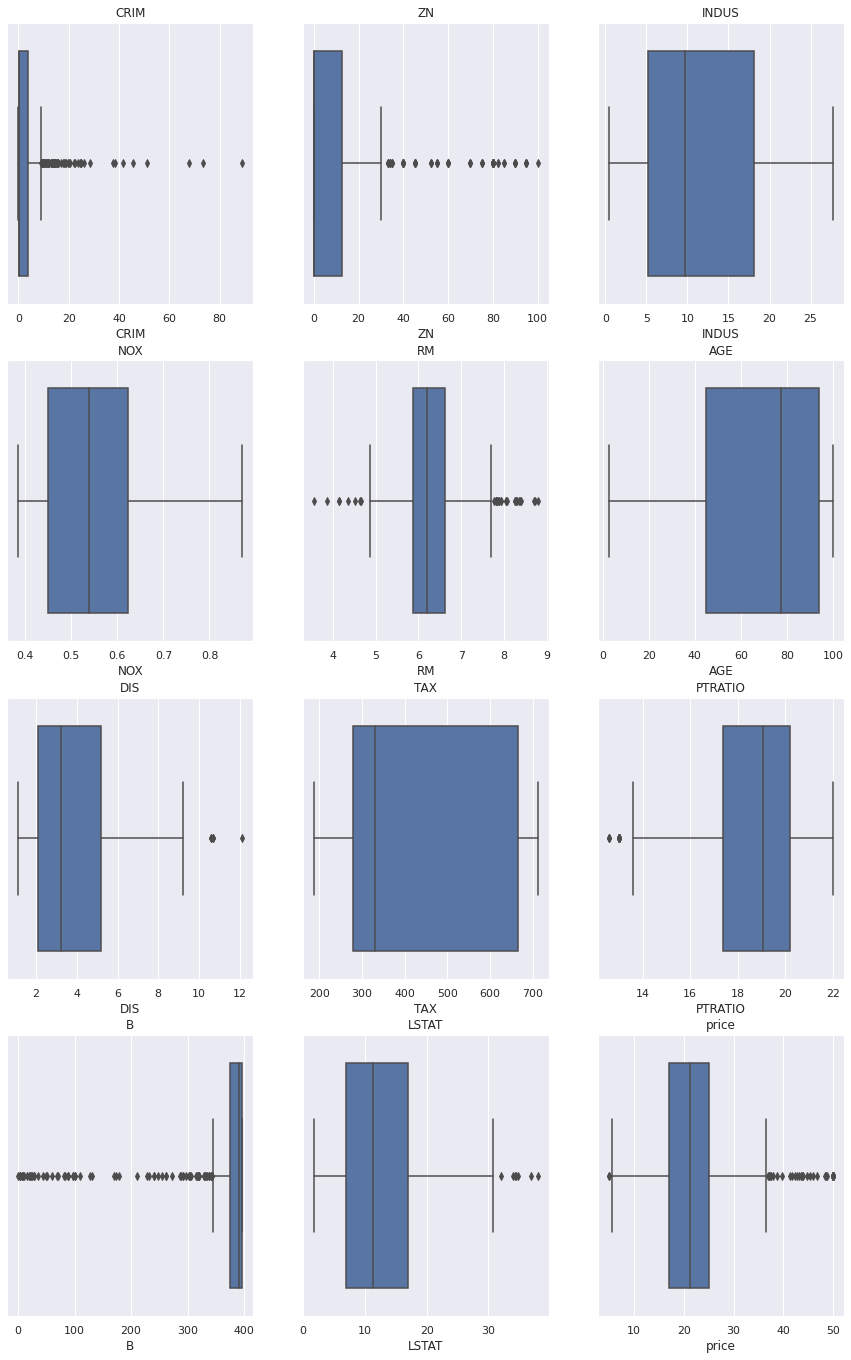

In [ ]:
df1 = df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX','PTRATIO', 'B', 'LSTAT', 'price']]
fig1 = plt.figure(figsize=(15,30))
sns.set(font_scale=1)

for i in enumerate(df1):
  plt.subplot(5,3,i[0]+1)
  ax = sns.boxplot(i[1],data=df1).set(title='{}'.format(i[1]))
plt.show()

- We have outliers in 

# Outlier Detection

Few Important things to remember in Outlier Detection:
- Its never advisable to directly remove the outliers from boxplots as they may be the important estimates of the data. 
- Once there is huge change in the accuracy and other metrics, we need to get back to the inclusion of the Outliers and their importance in realtime.
- Ultimately, its important to understand the case we are dealing with and proceed accordingly.





## For Outlier detection, Here we are proceeding by the conventional way of using Numerical range in the data.

### CRIM 

#### Now, How should we decide if we can remove or modify the feature data?
- Lets deal with CRIM- Crime rate in the town. 
- We know that in general Price goes down if there is high crime rate which is also evident from the correlation plot as there is negative indication for this.
- Outlier here indicates the distant number from the average, having high variation. If that outlier effect is shown on other factors, we should never remove it. In any other case, we should plot a boxplot and check the inference. 
- For huge sets of data, We can check with bias and variance. We can also perform BIAS DETECTION and VARIANCE to get the automated functioning of outliers of the system.

In [ ]:
df.CRIM.max()

88.9762

In [ ]:
df.CRIM.min()

0.00632

In [ ]:
df.CRIM.mean()

3.613523557312254

In [ ]:
print(df.CRIM.quantile(0.7))
print(df.CRIM.quantile(0.8))
print(df.CRIM.quantile(0.9))

1.72844
5.58107
10.753


**We have 70% of data below 1.72844, 80% of data below 5.58107 and 90% of data below 10.753. <br>**
#### Let's check the effect of these outliers with quartile wise on other features of the data.

In [ ]:
df[df['CRIM']>df.CRIM.quantile(0.9)].count()

CRIM       51
ZN         51
INDUS      51
CHAS       51
NOX        51
RM         51
AGE        51
DIS        51
RAD        51
TAX        51
PTRATIO    51
B          51
LSTAT      51
price      51
dtype: int64

- It seems that we have 51 values to check the effect. Lets assign to another dataframe. 

In [ ]:
df1 = df[df['CRIM']>df.CRIM.quantile(0.9)]

In [ ]:
df.price.mean()

22.532806324110677

In [ ]:
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
367,13.5222,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1
373,11.1081,0.0,18.1,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77,13.8
374,18.4982,0.0,18.1,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8
375,19.6091,0.0,18.1,0.0,0.671,7.313,97.9,1.3163,24.0,666.0,20.2,396.90,13.44,15.0
376,15.2880,0.0,18.1,0.0,0.671,6.649,93.3,1.3449,24.0,666.0,20.2,363.02,23.24,13.9


- Logically, Increase in crime rate has to reduce the price. We are considering 0.75*mean. If the price goes beyond this in high crime data, it should be removed. Lets remove all of them.

In [ ]:
df2 = df1[df1['price']>df.price.mean()*0.75]

In [ ]:
df2.shape

(9, 14)

The above contradicts with the general assumptions between CRIME RATE and PRICE. Lets take them out!!

In [ ]:
df.drop(df2.index, axis=0,inplace=True)

In [ ]:
df.shape

(497, 14)

Even though, it is time taking, but its the important part that we understand the feature Importance. For huge data we can perform feature Importance, which we will see shortly!! 

### Let's do the same for the ZN- But we will proceed by other way.
- Here this is proportion that we are looking at!! 
- Lets bin the data, Binning is categorizing the data into groups for easy check of the interdependence. 

In [ ]:
print(df.ZN.max())
print(df.ZN.min())
print(df.ZN.mean())

print(df.ZN.quantile(0.7))
print(df.ZN.quantile(0.8))
print(df.ZN.quantile(0.9))


100.0
0.0
11.569416498993963
0.0
21.0
45.0


So, we have mean value at 11.57, 70% of data are zeroes. 
Lets consider bins these ways to categorize.

In [ ]:
df['ZN_bins'] = pd.cut(x = df['ZN'], bins=[0,1,10,25,50,100])

In [ ]:
df.ZN_bins.value_counts()

(10, 25]     57
(50, 100]    45
(25, 50]     32
(0, 1]        0
(1, 10]       0
Name: ZN_bins, dtype: int64

In [ ]:
df.head() #zero is exclusive here, So it is taken as null value. However, it is not taken. 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,ZN_bins
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,"(10.0, 25.0]"
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,NaN
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,NaN
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,NaN
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,NaN


Now, that we know we have 45 values above 50. Lets consider them and deal them.

In [ ]:
df3 = df[df['ZN']>50]

In [ ]:
df3.shape

(45, 15)

In [ ]:
df3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,ZN_bins
39,0.02763,75.0,2.95,0.0,0.428,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32,30.8,"(50, 100]"
40,0.03359,75.0,2.95,0.0,0.428,7.024,15.8,5.4011,3.0,252.0,18.3,395.62,1.98,34.9,"(50, 100]"
54,0.01360,75.0,4.00,0.0,0.410,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80,18.9,"(50, 100]"
55,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81,35.4,"(50, 100]"
56,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7,"(50, 100]"


- Even having ZN, if the price doesnot show high values, they are not fine. Lets take them out!!

In [ ]:
df4 = df3[df3['price']<df3.price.mean()*1.25] #Considering price atleast to be 1.25*mean  for such high zoned proportions.

In [ ]:
df.drop(df4.index,axis=0,inplace=True)

In [ ]:
df.shape

(459, 15)

- We shall see a new method of dealing with age. From the boxplot there are no outliers, but it is safe to check if there is actually an evident relation or independence from the output. 
- AGE: proportion of land before 1940's which doesn't value much as clear from correlation. 


In [ ]:
print(df.AGE.max())
print(df.AGE.min())
print(df.AGE.mean())

print(df.AGE.quantile(0.7))
print(df.AGE.quantile(0.8))
print(df.AGE.quantile(0.9))

100.0
2.9
71.5041394335512
92.6
96.0
98.8


We have mean here at 71.5 and minimum value at 2.9

In [ ]:
df['age_bins'] = pd.cut(x = df['AGE'], bins=[0,10,25,50,75,90,100])

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,ZN_bins,age_bins
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,"(10.0, 25.0]","(50, 75]"
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,NaN,"(75, 90]"
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,NaN,"(50, 75]"
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,NaN,"(25, 50]"
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,NaN,"(50, 75]"


In [ ]:
df.age_bins.value_counts()

(90, 100]    163
(50, 75]      94
(75, 90]      92
(25, 50]      78
(10, 25]      20
(0, 10]       12
Name: age_bins, dtype: int64

We have 32 values less than 25. Lets check them if their price dropped!! 

In [ ]:
df5 = df[df['AGE']<25]

In [ ]:
df5.shape

(32, 16)

In [ ]:
df5.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,ZN_bins,age_bins
41,0.12744,0.0,6.91,0.0,0.448,6.770,2.9,5.7209,3.0,233.0,17.9,385.41,4.84,26.6,NaN,"(0, 10]"
42,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81,25.3,NaN,"(0, 10]"
43,0.15936,0.0,6.91,0.0,0.448,6.211,6.5,5.7209,3.0,233.0,17.9,394.46,7.44,24.7,NaN,"(0, 10]"
52,0.05360,21.0,5.64,0.0,0.439,6.511,21.1,6.8147,4.0,243.0,16.8,396.90,5.28,25.0,"(10.0, 25.0]","(10, 25]"
53,0.04981,21.0,5.64,0.0,0.439,5.998,21.4,6.8147,4.0,243.0,16.8,396.90,8.43,23.4,"(10.0, 25.0]","(10, 25]"


In [ ]:
df6 = df5[df5['price']>df.price.mean()]

In [ ]:
df6.shape

(29, 16)

In [ ]:
df.drop(df6.index,axis=0,inplace=True)

In [ ]:
df.shape

(430, 16)

In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price', 'ZN_bins', 'age_bins'],
      dtype='object')

## Cleaning the data.
- CHAS and RAD are categorical variables. 
- if there are unusual variables., we need to remove them. 


In [ ]:
df.CHAS.unique()

array([0., 1.])

In [ ]:
df.CHAS.value_counts()

0.0    396
1.0     34
Name: CHAS, dtype: int64

In [ ]:
df.RAD.unique()

array([ 1.,  2.,  3.,  5.,  4.,  8.,  6.,  7., 24.])

In [ ]:
df.RAD.value_counts()

24.0    123
5.0     104
4.0      91
3.0      29
8.0      22
6.0      21
2.0      18
1.0      12
7.0      10
Name: RAD, dtype: int64

Both the feature data is fine with categories. 

Average no of Rooms - RM
Lets round it up to nearest integer!! 

In [ ]:
df['RM'] = round(df.RM,0)

In [ ]:
df.RM.unique()

array([7., 6., 5., 8., 9., 4.])

In [ ]:
df.RM.value_counts()

6.0    275
7.0     93
5.0     35
8.0     20
4.0      4
9.0      3
Name: RM, dtype: int64

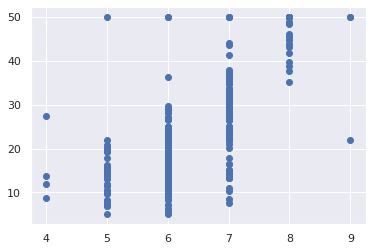

In [ ]:
plt.scatter(df.RM,df.price)

From the plot, we can see that for RM==7 and 9, we have data for low prices, which needs to be checked!! 

In [ ]:
df7 = df[df['RM']==9]

In [ ]:
df7.shape

(3, 16)

In [ ]:
df7.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,ZN_bins,age_bins
225,0.52693,0.0,6.20,0.0,0.504,9.0,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0,NaN,"(75, 90]"
257,0.61154,20.0,3.97,0.0,0.647,9.0,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0,"(10.0, 25.0]","(75, 90]"
364,3.47428,0.0,18.10,1.0,0.718,9.0,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9,NaN,"(75, 90]"


### Now, Lets check the data for NOx and TAX using InterQuartile Range

In [ ]:
def InterQuartileRange(df,lst,low,high): 
  q1 = df[lst].quantile(low)
  q3 = df[lst].quantile(high)
  IQR = q3-q1
  print(q1,q3,IQR)
  df = df[(df[lst]>q1-1.5*IQR) & (df[lst]<q3+1.5*IQR)]
  print('Shape:', df.shape)
  sns.boxplot(lst,data=df)
  return df

- The above functions takes the data and the feature and finds the values in between the range given.
- It only takes the values between 1.5 times higher and lower than the range respectively. 

In [ ]:
df8 = df.copy()

In [ ]:
df8.shape

(430, 16)

In [ ]:
df9 = df8[['NOX','TAX']]
df9.describe()

,NOX,TAX
count,430.000000,430.000000
mean,0.573797,418.067442
std,0.112310,173.040889
min,0.394000,188.000000
25%,0.489000,279.000000
50%,0.544000,352.000000
75%,0.653000,666.000000
max,0.871000,711.000000


In [ ]:
df8[df8['NOX']>df8.NOX.quantile(0.9)].count()

CRIM        43
ZN          43
INDUS       43
CHAS        43
NOX         43
RM          43
AGE         43
DIS         43
RAD         43
TAX         43
PTRATIO     43
B           43
LSTAT       43
price       43
ZN_bins      0
age_bins    43
dtype: int64

0.439 0.7135000000000001 0.27450000000000013
Shape: (430, 16)


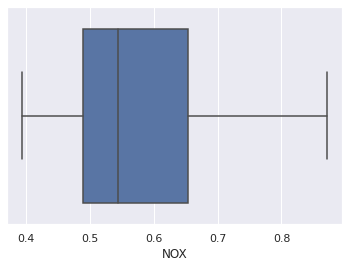

In [ ]:
df8 = InterQuartileRange(df8,'NOX',0.1,0.9)

233.0 666.0 433.0
Shape: (430, 16)


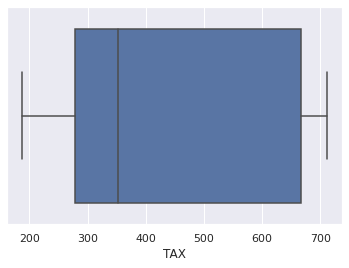

In [ ]:
df8 = InterQuartileRange(df8,'TAX',0.1,0.9)

As there is no change, we shall proceed with df

### Using Zscore method, lets check for --LSTAT % lower status of the population and INDUS

In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price', 'ZN_bins', 'age_bins'],
      dtype='object')

In [ ]:
from scipy.stats import zscore
df['LSTAT_zscore'] = df[['LSTAT']].apply(zscore)
df['INDUS_zscore'] = df[['INDUS']].apply(zscore)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,ZN_bins,age_bins,LSTAT_zscore,INDUS_zscore
0,0.00632,18.0,2.31,0.0,0.538,7.0,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,"(10.0, 25.0]","(50, 75]",-1.206871,-1.441353
1,0.02731,0.0,7.07,0.0,0.469,6.0,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,NaN,"(75, 90]",-0.617403,-0.734482
2,0.02729,0.0,7.07,0.0,0.469,7.0,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,NaN,"(50, 75]",-1.341485,-0.734482
3,0.03237,0.0,2.18,0.0,0.458,7.0,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,NaN,"(25, 50]",-1.495937,-1.460659
4,0.06905,0.0,2.18,0.0,0.458,7.0,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,NaN,"(50, 75]",-1.157276,-1.460659


In [ ]:
df10 = df[~((df.LSTAT_zscore>-3) & (df.LSTAT_zscore<3))]

In [ ]:
df10.shape

(3, 18)

In [ ]:
df10.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,ZN_bins,age_bins,LSTAT_zscore,INDUS_zscore
373,11.1081,0.0,18.1,0.0,0.668,5.0,100.0,1.1742,24.0,666.0,20.2,396.90,34.77,13.8,NaN,"(90, 100]",3.014345,0.903499
374,18.4982,0.0,18.1,0.0,0.668,4.0,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8,NaN,"(90, 100]",3.467782,0.903499
414,45.7461,0.0,18.1,0.0,0.693,5.0,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0,NaN,"(90, 100]",3.327500,0.903499


In [ ]:
df.drop(df10.index,axis=0,inplace=True)

In [ ]:
df11 = df[~((df.INDUS_zscore>-3) & (df.INDUS_zscore<3))]

In [ ]:
df11.shape

(0, 18)

- Similarly, we can work on other features. While removing outliers, having a look at all the features helps us not removing useful information.
- Understanding data is really important for such reasons.

Before moving to feature selection, we can 
- Remove unnecessary features
- plot necessary plots
- Encode categorical data

In [ ]:
# Removing unnecessary features

df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price', 'ZN_bins', 'age_bins', 'LSTAT_zscore',
       'INDUS_zscore'],
      dtype='object')

In [ ]:
df.drop(['ZN_bins', 'age_bins', 'LSTAT_zscore','INDUS_zscore'],axis=1,inplace=True)

In [ ]:
df.shape

(427, 14)

- Categorical features: RM, CHAS, RAD
- Numerical features: CRIM, ZN, INDUS, NOX, AGE, DIS, TAX, PTRATIO, B, LSTAT, PRICE

In [ ]:
#Rename columns for better understanding
df.rename(columns = {'CRIM':'Crime rate','ZN':'Land proportion','INDUS':'NonRetail','CHAS':'Charles River','RM':'Rooms','DIS':'Distance','RAD':'Radial Highways','B':'Black Proportion','LSTAT':'Lower Status Population'},inplace=True)

In [ ]:
## Plot necessary plots
df_cat = df[['Rooms', 'Charles River', 'Radial Highways']]   #categorical dataframe
df_num = df[['Crime rate', 'Land proportion', 'NonRetail', 'NOX', 'AGE', 'Distance', 'TAX','PTRATIO', 'Black Proportion', 'Lower Status Population','price']]

### Count plots for all the categorical plots

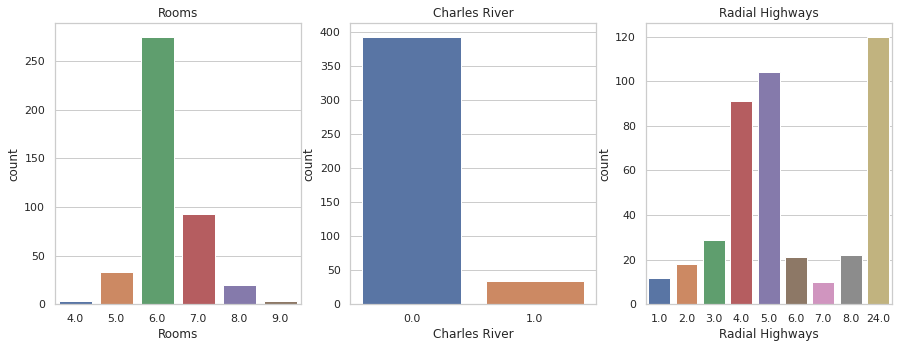

In [ ]:
fig1 = plt.figure(figsize=(15,30))
sns.set(font_scale=1)
sns.set_style('whitegrid')

for i  in enumerate(df_cat):
  plt.subplot(5,3,i[0]+1)
  ax = sns.countplot(i[1],data=df_cat).set(title='{}'.format(i[1]))
plt.show()

- Major proportion of data has 6 rooms in them, Lot of places donot have Charles River in their location, Accessibility Index for lot of places for highways is high

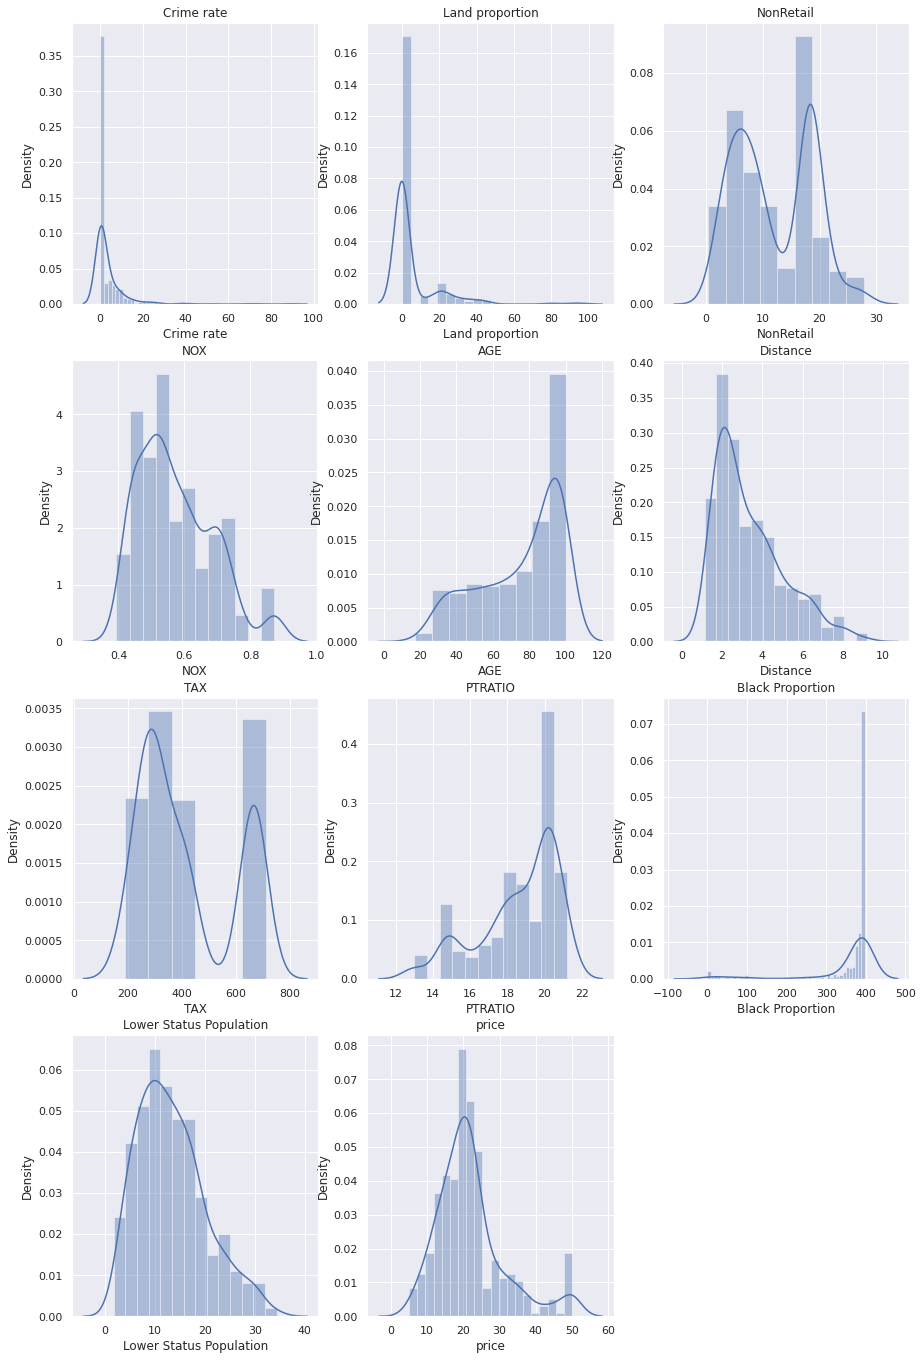

In [ ]:
fig4 = plt.figure(figsize=(15,30))
sns.set(font_scale=1)
for i  in enumerate(df_num):
  plt.subplot(5,3,i[0]+1)
  ax = sns.distplot(df_num[i[1]]).set(title='{}'.format(i[1]))
plt.show()

We can observe three things here:
- Frequency of different ranges of values
- Null ranges
- Distribution types for which we can analyse
- Further sampling, we can also validate  for central Limit theorem. 


For understanding, Lets plot stripplots and violin plots for numerical data

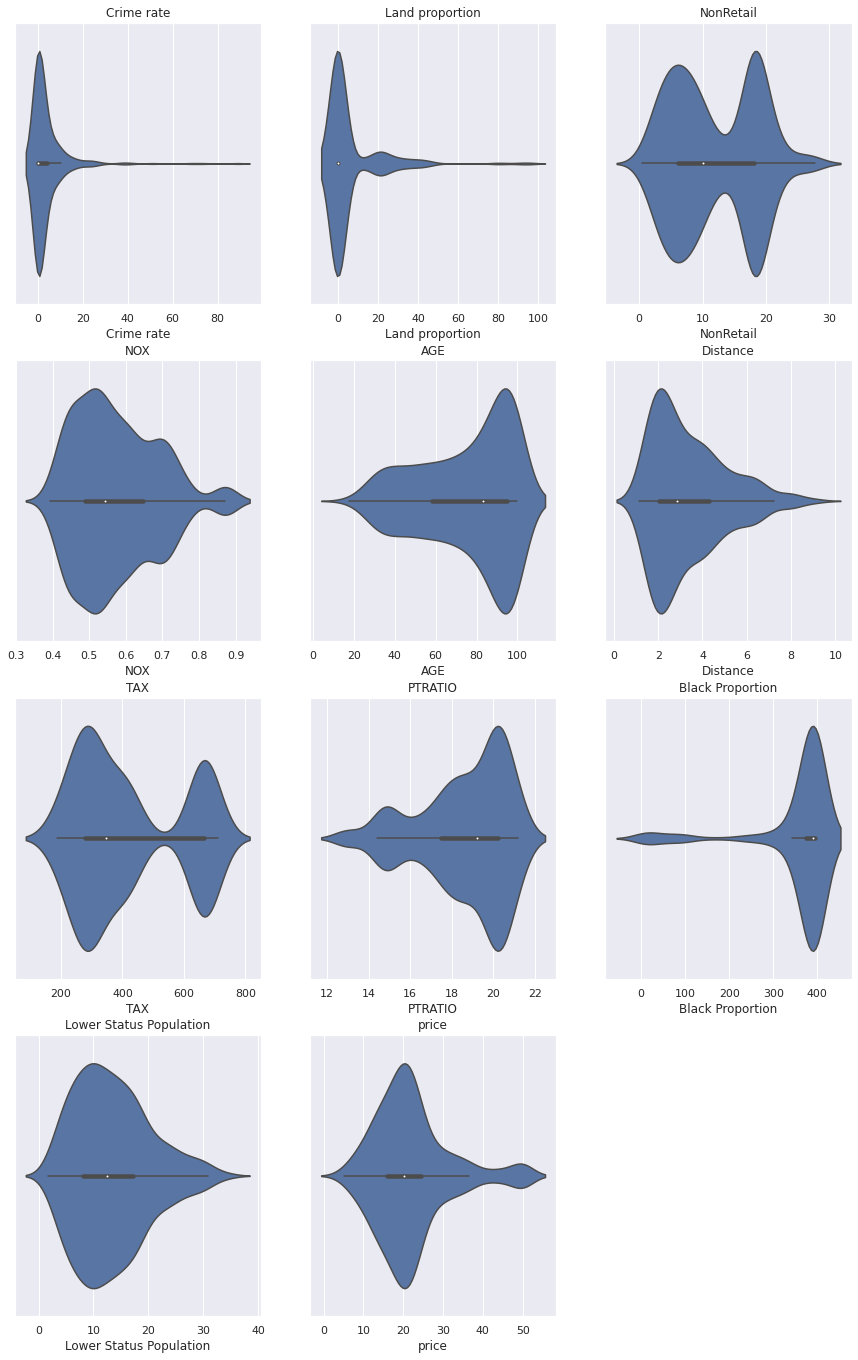

In [ ]:
fig4 = plt.figure(figsize=(15,30))
sns.set(font_scale=1)
for i  in enumerate(df_num):
  plt.subplot(5,3,i[0]+1)
  ax = sns.violinplot(df_num[i[1]]).set(title='{}'.format(i[1]))
plt.show()

- We can always use <br>
      -- Box plots
      -- Violin plots
      -- Swarm plots
      -- Strip plots for outlier detection

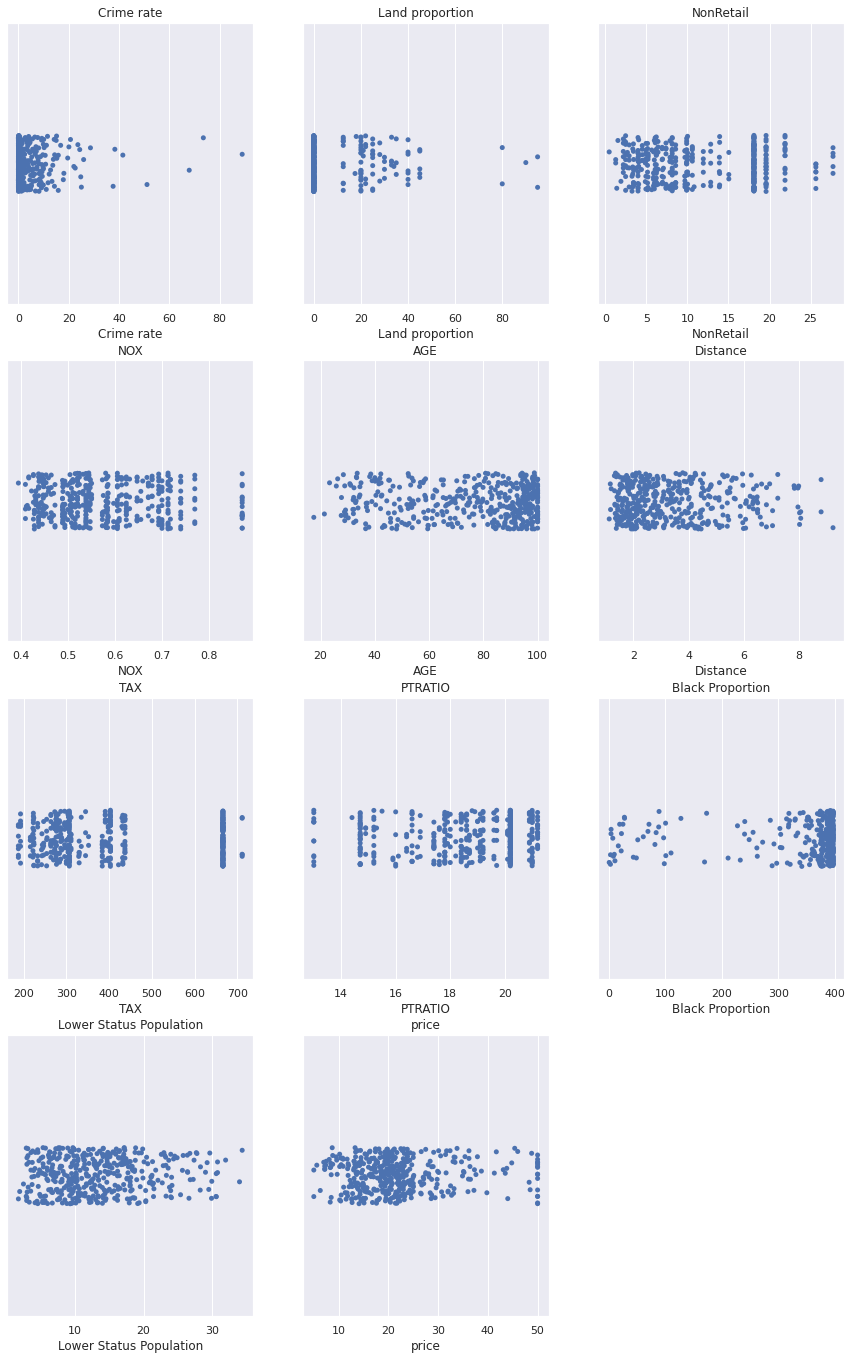

In [ ]:
fig4 = plt.figure(figsize=(15,30))
sns.set(font_scale=1)
for i  in enumerate(df_num):
  plt.subplot(5,3,i[0]+1)
  ax = sns.stripplot(df_num[i[1]]).set(title='{}'.format(i[1]))
plt.show()

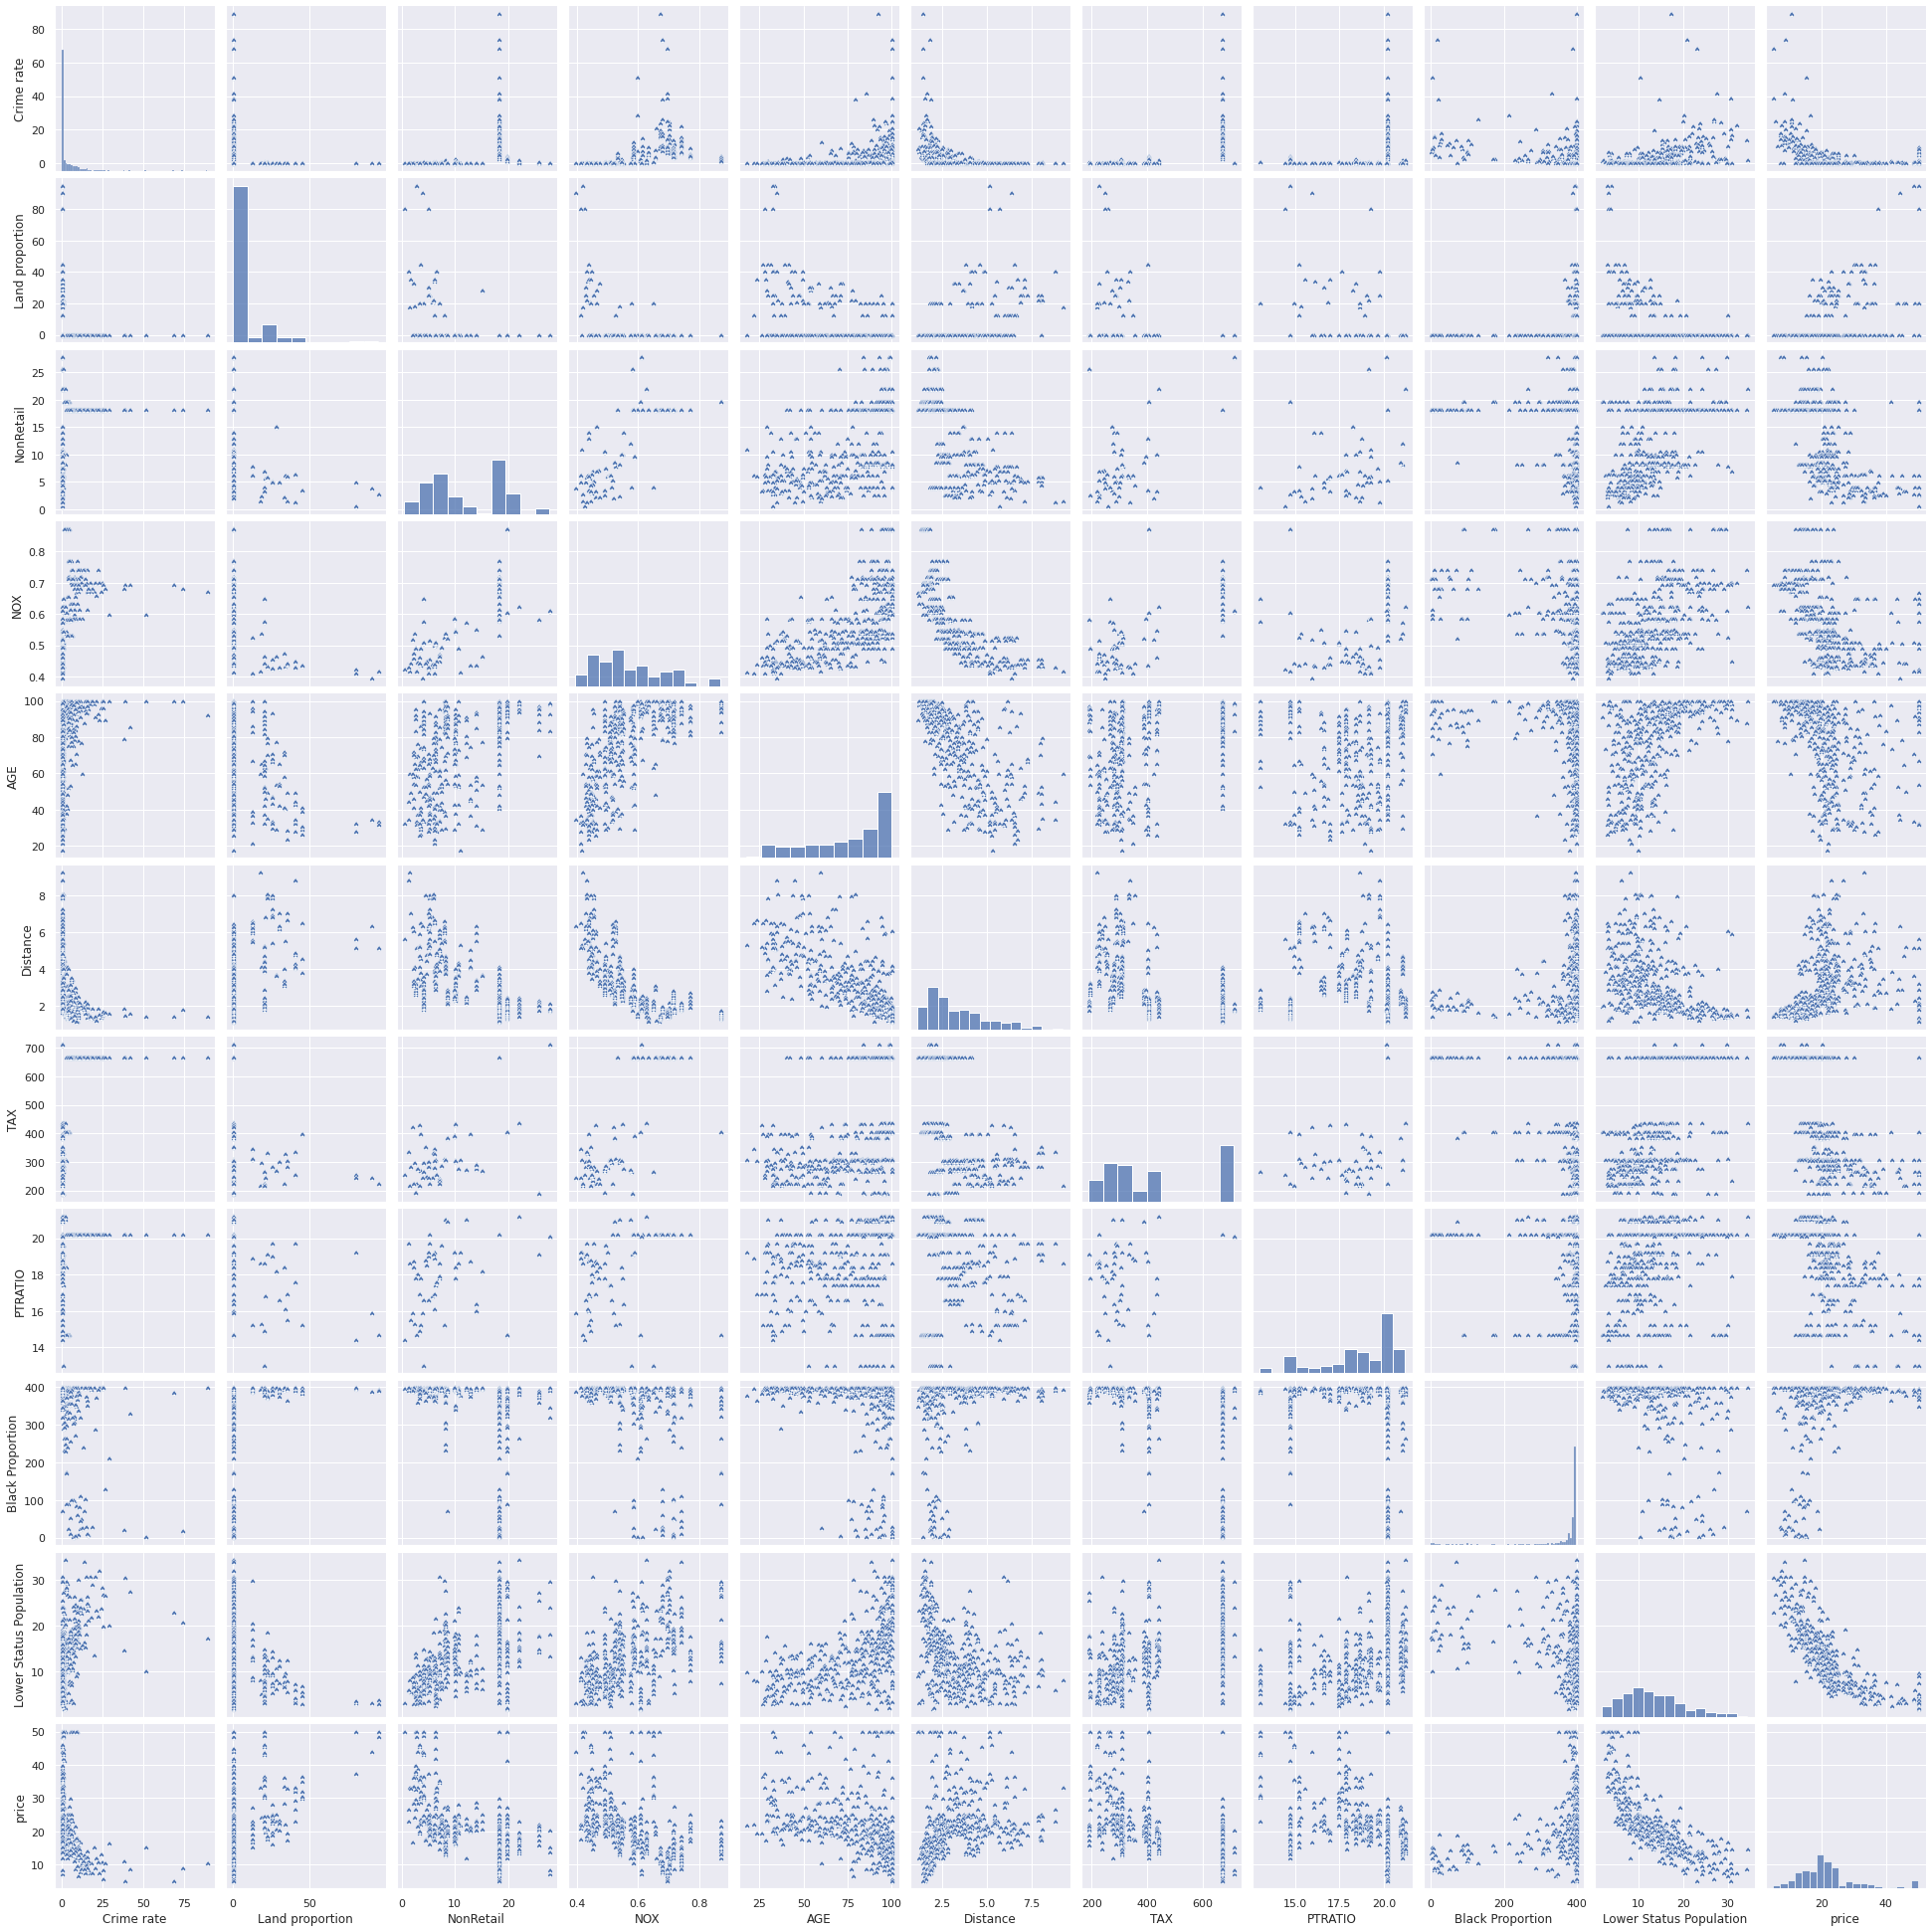

In [ ]:
sns.pairplot(data=df_num,palette='reds',markers=r'$\spadesuit$')
plt.show()

In [ ]:
df.head()

,Crime rate,Land proportion,NonRetail,Charles River,NOX,Rooms,AGE,Distance,Radial Highways,TAX,PTRATIO,Black Proportion,Lower Status Population,price
0,0.00632,18.0,2.31,0.0,0.538,7.0,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.0,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.0,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,7.0,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.0,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Label Encoder

- It encodes different categorical variables to label to sequential numbers for easy processing of the model. 

In [ ]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
df['Radial Highways']=lc.fit_transform(df['Radial Highways'])

In [ ]:
df.head()

,Crime rate,Land proportion,NonRetail,Charles River,NOX,Rooms,AGE,Distance,Radial Highways,TAX,PTRATIO,Black Proportion,Lower Status Population,price
0,0.00632,18.0,2.31,0.0,0.538,7.0,65.2,4.0900,0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.0,78.9,4.9671,1,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.0,61.1,4.9671,1,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,7.0,45.8,6.0622,2,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.0,54.2,6.0622,2,222.0,18.7,396.90,5.33,36.2


## Feature Importance

- We can find feature Importance using SelectKBest using chi2 function and f_classif functions.
- We can also use RandomForestRegressor to find best features. 

We shall see performing SelectKBest using f_classif and RandomForestRegressor here

In [ ]:
from sklearn.feature_selection import SelectKBest,f_classif         #feature selection package is selected and selectkbest is imported to choose the best features
x =df.iloc[:,:-1]                                                                      
y =df.iloc[:,-1]                                                                            
bestfeatures = SelectKBest(score_func=f_classif,k=10)              
fit = bestfeatures.fit(x,y)                                                           
dfscores  =pd.DataFrame(fit.scores_)                                     
dfcolumns = pd.DataFrame(x.columns)                         
featureScores = pd.concat([dfcolumns,dfscores],axis=1)      
featureScores.columns = ['Specs', 'Score']                           

featureScores.nlargest(14,'Score')

,Specs,Score
12,Lower Status Population,5.589034
0,Crime rate,3.527961
5,Rooms,2.207620
9,TAX,2.133049
1,Land proportion,1.958791
4,NOX,1.943523
2,NonRetail,1.921597
6,AGE,1.801452
11,Black Proportion,1.757543
8,Radial Highways,1.655012


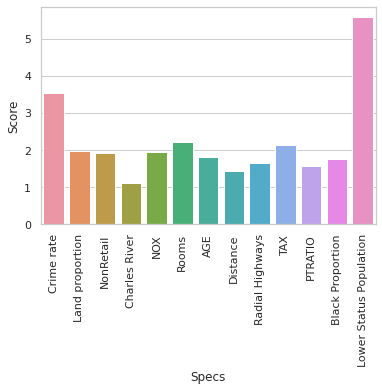

In [ ]:
sns.set_style('whitegrid')

sns.barplot(data=featureScores,x="Specs",y='Score')
plt.xticks(rotation=90)
plt.show()

## Random Forest Regressor

In [ ]:
X = df.drop('price',axis=1)
Y = df['price']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, max_depth= 10) 
rf.fit(X,Y)

RandomForestRegressor(max_depth=10)

In [ ]:
Important_features = rf.feature_importances_

In [ ]:
Important_features

array([0.06472167, 0.00169564, 0.0155463 , 0.0010023 , 0.01969729,
       0.07176623, 0.02000687, 0.05101269, 0.00239538, 0.02181065,
       0.02541709, 0.02054874, 0.68437915])

In [ ]:
columns = X.columns

In [ ]:
feature_importance = pd.DataFrame(Important_features)

In [ ]:
feature_importance['columns'] = columns.T

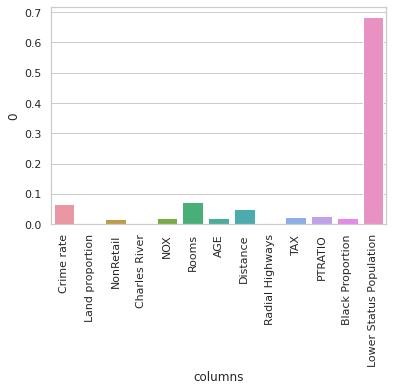

In [ ]:
sns.set_style('whitegrid')

sns.barplot(data=feature_importance,x='columns',y=feature_importance[0])
plt.xticks(rotation=90)
plt.show()

- Along with the added information, We can also perform feature transformation, getting dummies and a lot. 
- Feature Engineering is important as well as improving task. 